In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

In [228]:
def pol(x,a0,a1,a2,a3):
    #y = a0 + a1*x + a2*x**2. + a3*x**3. + a4*x**0.5 + a5*x**1.5
    y = a0 + a1*x + a2*x**2. + a3*x**3. 
    return y

#filtering data method using numpy


def data():
        f606, f814, flag,rms1,rms2=np.genfromtxt('HOROLOGIUMI.txt', dtype=float, comments='#', usecols=(2,5,10,3,6), unpack=True)
        f6=[]
        f8=[]
        i=0
        for i in range(len(f606)):
                if (rms1[i]<=1):
                   
                        if (rms2[i]<=1):
                                if (flag[i]==1):
                                        f6.append(f606[i])
                                        f8.append(f814[i])
                                        
                                        
                i+=1
        return f6,f8

f6,f8=data()
f606=np.array(f6)
f814=np.array(f8)

N=len(f606)
color=np.zeros(N,float)

i=0
for i in range(len(color)):
        color[i]=f606[i]-f814[i]
        i+=1
color.shape

(1644,)

In [206]:
#filtering data method using pandas

ou = pd.read_csv("edit_horo.csv")
df=ou.query('rms1<=1 &  rms2<=1')
f606=df.F606W
f814=df.F814W
color1=f606-f814
color1.shape

(1644,)

In [229]:
# isochrone from Darthmouth

fname5="tmp1616357115.iso" # +0.2  13.8Gyrs
M,V,I=np.genfromtxt(fname5,dtype=float,\
                    comments="#",usecols=(1,10,15),unpack=True)

In [230]:
########################## iso 13.8 alpha 0.2   fe=-2.4 #################

f6_138,f8_138=np.genfromtxt('tmp1616357115.iso', dtype=float, comments='#', usecols=(10,15), unpack=True)
N1=int(len(f6_138))
color_iso138=np.zeros(N1,float)
l=0
for l in range(N1):
        color_iso137[l]=f6_137[l]-f8_137[l]
        l+=1

########################################### Fitting isochron ######################
dmod=19.75
extinction=0.025

###f814 filter        
Ex_i=extinction    
df814=dmod # distance module
Ai=1.8*Ex_i # extinction
ident8_138=np.ones(N1,float) # inserting ones to array. need to multiply
Ifin=np.zeros(N1,float)
Ifin[:]=f8_138[:]+df814*ident8_138[:]+Ai*ident8_138[:]

### f606 filter
Ex_v=extinction
df606=dmod
Av=3.1*Ex_v
ident6_138=np.ones(N1,float)
Vfin=np.zeros(N1,float)
Vfin[:]=f6_138[:]+df606*ident6_138[:]+Av*ident6_138[:]

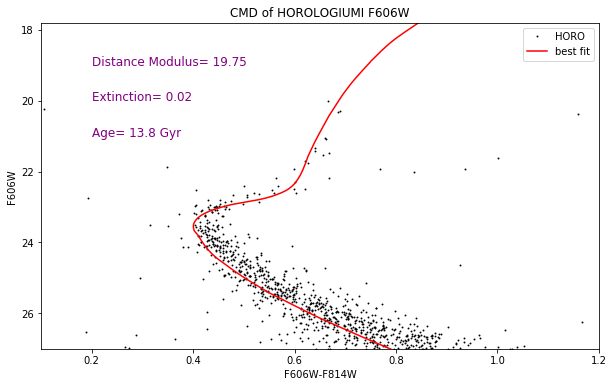

In [231]:
############################ plotting graphs ########################################

#Fitting isochron ##


#dmod=19.75
#E=0.018
#Av=3.1*E   
#Ai=1.8*E

#Vfin=V+dmod+Av
#Ifin=I+dmod+Ai


Y=Vfin
#color_iso137
fig, ax = plt.subplots(figsize=(10, 6))

##############graph for F606W

ax.plot(color,f606,"ko", markersize=0.9,label="HORO")

ax.plot(color_iso137,Y,color='r',label="best fit")
style = dict(size=12, color='purple')
ax.text(0.2, 19, "Distance Modulus= 19.75",ha="left", **style)
ax.text(0.2, 20, "Extinction= 0.02",ha="left", **style)
ax.text(0.2, 21, "Age= 13.8 Gyr",ha="left", **style)
ax.set_xlim(0.1,1.2)
ax.set_ylim(17.8,27)
ax.set_xlabel('F606W-F814W')
ax.set_ylabel("F606W")
ax.invert_yaxis()
ax.set_title("CMD of HOROLOGIUMI F606W")


ax.legend()

plt.savefig("HOROLOGIUMI_F606W.jpg")
plt.show()


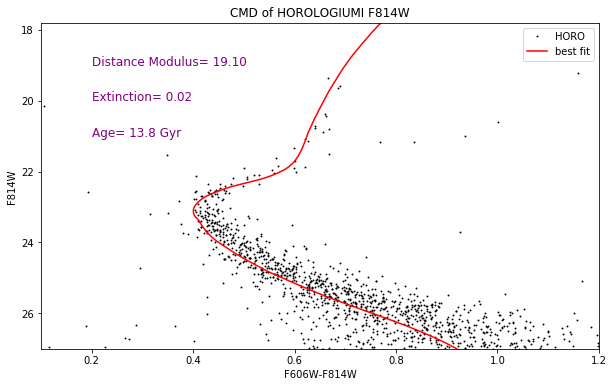

In [219]:
Y=Ifin
#color_iso137
fig, ax = plt.subplots(figsize=(10, 6))

##############graph for F814W

ax.plot(color,f814,"ko", markersize=0.9,label="HORO")

ax.plot(color_iso137,Y,color='r',label="best fit")
style = dict(size=12, color='purple')
ax.text(0.2, 19, "Distance Modulus= 19.10",ha="left", **style)
ax.text(0.2, 20, "Extinction= 0.02",ha="left", **style)
ax.text(0.2, 21, "Age= 13.8 Gyr",ha="left", **style)
ax.set_xlim(0.1,1.2)
ax.set_ylim(17.8,27)
ax.set_xlabel('F606W-F814W')
ax.set_ylabel("F814W")
ax.invert_yaxis()
ax.set_title("CMD of HOROLOGIUMI F814W")


ax.legend()

plt.savefig("HOROLOGIUMI_F814W.jpg")
plt.show()


In [232]:
################## interpolation main sequence ######################
from scipy import optimize

ms6 = []
ms8 = []
colms6 = []
colms8 = []

for i in range(int(len(Vfin))):
    if(Vfin[i]>23.5 and Vfin[i]<30):
        ms6.append(Vfin[i])
        colms6.append(color_iso137[i])
for i in range(int(len(Ifin))):
    if(Ifin[i]>23.5 and Ifin[i]<30):
        ms8.append(Ifin[i])
        colms8.append(color_iso137[i])

par = [1.,1.,1.,1.,1.,1.,1.]
poptms, pcovms = optimize.curve_fit(pol, colms6, ms6,p0=(par[0], par[1], par[2], par[3]))
popt2ms, pcov2ms = optimize.curve_fit(pol, colms8, ms8,p0=(par[0], par[1], par[2], par[3]))

ctest = np.linspace(0.4, 1., int(1e4))
ms6V = pol(ctest, poptms[0], poptms[1], poptms[2], poptms[3])
ms8I = pol(ctest, popt2ms[0], popt2ms[1], popt2ms[2], popt2ms[3])

In [233]:
###### binary for equal mass(q=1) #########
M6q1 = ms6V - 0.75
M8q1 = ms8I - 0.75

In [234]:
################ linear interpolation of q=0.6 ####################

# q=0.6
Vq3 =Vfin-0.267
Iq3 =Ifin-0.267
Xq3=Vq3-Iq3
Yq3=Vq3




M6btest=[]
M8btest=[]
ctest6=[]
ctest8=[]
for i in range(int(len(Vq3))):
        if (Vq3[i]>23.5):
                M6btest.append(Vq3[i])
                ctest6.append(Xq3[i])
for i in range(int(len(Iq3))):
        if (Iq3[i]>23.5):
                M8btest.append(Iq3[i])
                ctest8.append(Xq3[i])

par = [1.,1.,1.,1.,1.]
popt, pcov = optimize.curve_fit(pol, ctest6, M6btest,p0=(par[0], par[1], par[2], par[3]))
popt2, pcov2 = optimize.curve_fit(pol, ctest8, M8btest,p0=(par[0], par[1], par[2], par[3]))

M6bint=pol(ctest, popt[0], popt[1], popt[2], popt[3])
M8bint=pol(ctest, popt2[0], popt2[1], popt2[2], popt2[3])

In [235]:
######################## filling regions in filter F606W #####
regAx = []
regAy = []
regBx = []
regBy = []

for i in range(int(len(f6))):
        if (f6[i]>23.5 and f6[i]<30.):
                c = color[i]
                ms = pol(c, poptms[0], poptms[1], poptms[2], poptms[3])
                q1 = ms-0.75
                if(f6[i]<ms and f6[i]>q1):
                #if(f6[i]>q1):
                        regAx.append(c)
                        regAy.append(f6[i])
                        q06 = pol(c, popt[0], popt[1], popt[2], popt[3])
                        if(f6[i]<q06):
                                regBx.append(c)
                                regBy.append(f6[i])

freq6 = float(int(len(regBx))/int(len(regAx)))
print(freq6)

0.2669826224328594


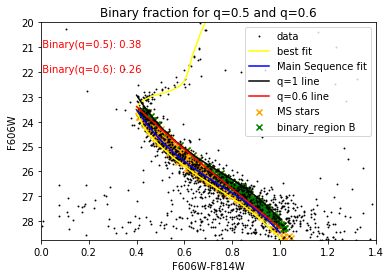

In [236]:
############# graph for F606W #########3

plt.plot(color,f606, "ko", markersize=0.9, label='data')
plt.plot(color_iso137,Y,color='yellow',label="best fit")
plt.plot(ctest,ms6test,color='blue',label='Main Sequence fit')
plt.plot(ctest,M6q1, 'black', label="q=1 line")


plt.scatter(regAx, regAy, marker='x', color="orange", label="MS stars")
plt.scatter(regBx, regBy, marker='x',color="green", label="binary_region B")


#plt.plot(col,M6b, 'y-', label="bin q=0.6")
plt.plot(ctest,M6bint,color='red',label='q=0.6 line')

style = dict(size=10, color='red')
plt.text(0.2, 21, "  Binary(q=0.5): 0.38",ha="center", **style)
plt.text(0.2, 22, "  Binary(q=0.6): 0.26",ha="center", **style)

plt.xlim(0.0,1.4)
plt.ylim(20.0,28.75)
plt.xlabel('F606W-F814W')
plt.ylabel("F606W")
plt.gca().invert_yaxis()
plt.title("Binary fraction for q=0.5 and q=0.6")


plt.legend()

plt.savefig("binaries.jpg")
plt.show()
